In [2]:
if(!require(install.load)) {install.packages("install.load");
library(install.load)}
install_load("plyr", "dplyr", "tidyr", "readr", "car", "lme4",
             "ggplot2", "cowplot", "devtools")

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand



# Outline

Introduce the F3 and the importance of population stratification.
 
We could start by running the null model for the simulated markers and look at the inflation of false positive?  Then run a permutation with total randomization to show that it would appear unbiased if we ignored population structure.  We can then introduce the mixed model analysis to account for population structure (perhaps Alastair can also comment on this in relation to a population with a complex pedigree). Then re-run the analysis of the null model?
 
I simulated one pleiotropic QTL in the F3 - so we can analyze the effect on traits 2a and 3a and we should see the same QTL appear - we can discuss this in relation to pleiotropy.
 
Lab session later in the week:
Genome prediction - fitting a model with all markers to predict phenotypes and how this can be used to estimate a genomic breeding value (basically a sort of BLUE for an individual based on their markers while estimating their BLUP from the random effects)
 
Multivariate model - go back to pleiotropic QTL and discuss how we could estimate the vector of effect while fitting G?

# Population stratification

More resolution, but more complicated

![](f3pop.png)

# Reading and plotting data

In [3]:
f3_data = read_csv("./F3 geno pheno with QTL effect.csv")
f3_data

Parsed with column specification:
cols(
  .default = col_integer(),
  Sex = col_character(),
  Trait1 = col_double(),
  Trait2 = col_double(),
  Trait3 = col_double(),
  Trait2a = col_double(),
  Trait3a = col_double()
)
See spec(...) for full column specifications.


ID,FAMILY,Sex,Sire,Dam,NURSE,LSB,LSW,Trait1,Trait2,⋯,G24,G25,G26,G27,G28,G29,G30,G31,Trait2a,Trait3a
492,11,F,82,173,173,8,8,0.08732662,12.511166,⋯,0,1,1,1,1,1,1,1,12.004366,25.99122
493,11,F,82,173,173,8,8,0.09732662,10.522276,⋯,1,1,1,1,1,1,1,1,10.522276,22.88304
494,14,F,85,114,173,7,8,0.09371156,13.818946,⋯,-1,-1,-1,-1,-1,-1,-1,-1,13.312146,26.25022
495,14,M,85,114,173,7,8,0.15897373,12.384913,⋯,0,0,0,0,0,0,1,1,12.891713,30.75996
496,11,F,82,173,173,8,8,0.02587000,13.101166,⋯,1,1,1,1,1,1,1,1,13.607966,31.49486
497,14,M,85,114,173,7,8,0.12987749,13.744913,⋯,-1,-1,-1,-1,-1,-1,-1,-1,13.238113,33.92932
498,14,M,85,114,173,7,8,0.10240803,13.376023,⋯,-1,-1,-1,0,0,0,0,0,12.869223,33.27632
499,11,F,82,173,173,8,8,0.09491825,13.953386,⋯,-1,-1,-1,-1,-1,-1,0,0,13.446586,28.12822
500,11,F,82,173,114,8,7,0.09938281,10.617069,⋯,-1,-1,-1,-1,-1,-1,0,0,10.110269,28.59073
501,11,M,82,173,114,8,7,0.09229518,10.383046,⋯,0,0,0,0,0,0,0,0,10.383046,28.14965


Warning message:
“Removed 6 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

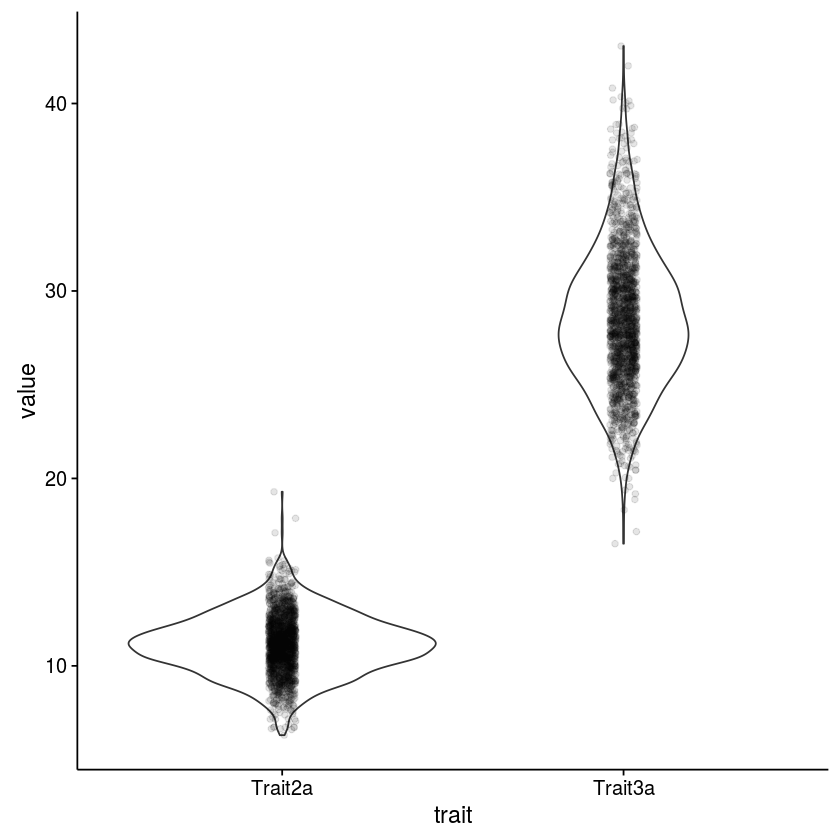

In [4]:
f3_data %>% 
    gather(trait, value, Trait2a:Trait3a) %>%
    ggplot(aes(trait, value)) + geom_violin() + geom_jitter(width = 0.1, alpha = 0.1)